# Programming Classifiers with Scikit Learn
#### By Jennifer Grannen and Osher Lerner

If you’ve been following the crash course, you’ve learned about modern machine learning tools from gradient descent to decision trees. In this post, we’re going to put pen to paper (or digits to keyboard) and take a crack at implementing them. Specifically, we’ll be programming SVM, logistic regression, and decision tree classification models to predict the presence of heart disease. 


## Programming Setup

All of the code will be run using a jupyter notebook -- an interactive way to write, run, and visualize blocks of code. Jupyter notebooks are standard practice in the field because of how they naturally support the flow of machine learning experiments.

Let’s first import all the libraries we’ll be using. 


In [1]:
import sklearn
from sklearn import tree, ensemble, svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils
np.random.seed(0)

Pandas and numpy will be helpful to store our data and perform operations on it. We will use matplotlib, a popular library for visualizing models and datasets. Last, we’ll import scikit-learn for some pre-implemented classifiers that we’ll use later.

Now let’s load our dataset. We’ll use Pandas to read in the csv file into a dataframe, to make it easy to work with later.

In [2]:
data = pd.read_csv("heart.csv")
feature_names = data.columns
discrete_features = ["sex", "cp", "fbs", "restecg", "exang", "ca", "thal"]
np.unique(data["thal"])
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


For each data point we have 14 features, one to predict (the presence of heart disease), and 13 others like sex, cholestrol level, chest pain, and electrocardiographic results. This data was collected in various hospitals in Europe, and for more information about it, visit https://www.kaggle.com/ronitf/heart-disease-uci#heart.csv. 

As we saw in Crash Course 3: The Bias-Variance Dilemma, to experiment with machine learning models we first need to split our data into a training and test set so that we have independent data for evaluation and don’t cheat. Let’s randomly shuffle our data and set aside 10,000 examples for the test set. We usually split our data to be 80% train and 20% test.

In [3]:
def split_test_train(data, percent_test):
    test_size = int(percent_test*len(data))
    test_indices = np.random.choice(data.index, size=test_size, replace=False)
    train_indices = [i for i in data.index if i not in test_indices]
    train_df = data.iloc[train_indices]
    train_Y = train_df["target"]
    train_X = train_df.drop("target", axis=1)
    test_df = data.iloc[test_indices]
    test_Y = test_df["target"]
    test_X = test_df.drop("target", axis=1)
    return train_X, train_Y, test_X, test_Y

In [4]:
train_X, train_Y, test_X, test_Y = split_test_train(data, 0.2)

For visualizations, we will also use a randomly generated 2-dimensional dataset with only age and chol features.

In [5]:
rand_data = utils.generate_random_data()
r_train_X, r_train_Y, r_test_X, r_test_Y = split_test_train(rand_data, 0.3)

## SVMs

The first algorithm we’ll use to classify this data is a support vector machine. As we covered in Part 2 of the crash course, SVMs are a very popular and versatile method for classification: they find a linear decision boundary which maximizes its distance from the data points closest to it (known as the **support vectors**). Calculating the “optimal” decision boundary (the one with the widest margin between the positive and negative predictions) is a tough (though interesting) problem. Fortunately, the mathematical details of this are implemented and packaged for us in ML libraries, such as scikit-learn for Python.

Let’s use sklearn to construct and train an SVM classifier.


In [19]:
np.random.seed(1)
clf = svm.LinearSVC()
clf.fit(r_train_X, r_train_Y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

Notice how short that was! Libraries like sklearn implement widely-used algorithms for us and make our lives easy by providing functions for us to classify our own data.

Let’s visualize what the model learned: we’ll plot the decision boundary that it learned, which tells us how it decided to split our training data into cases with and without heart disease.

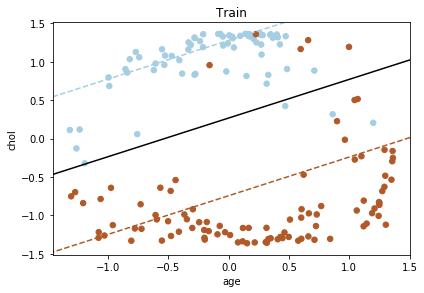

Train accuracy: 0.9518072289156626


In [20]:
utils.plot_decision_boundary(clf, r_train_X, r_train_Y, title="Train")
print("Train accuracy:", clf.score(r_train_X, r_train_Y))

It’s spot on! Notice how the decision boundary lies as far as it can from each individual datapoint, maximizing the length of the support vectors, and how it sacrifices misclassifying a few points to better fit the rest. But the true test is how it performs on data it didn’t see during training. How accurate are its classifications on the test set?

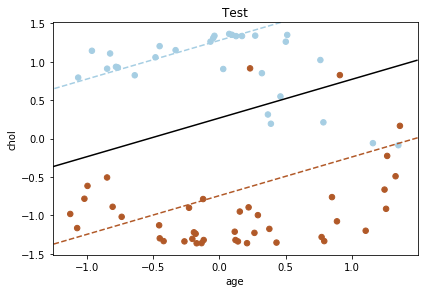

Test accuracy: 0.9


In [21]:
utils.plot_decision_boundary(clf, r_test_X, r_test_Y, title="Test")
print("Test accuracy:", clf.score(r_test_X, r_test_Y))

There’s a lot of misclassified points, i.e. points on the wrong side of the decision boundary. Perhaps we matched our training data too closely, instead of learning a general pattern. To stop a machine learning model from overfitting, we want to add regularization. Recall that for SVMs, we use a regularization parameter “c” to control how much we penalize points violating the margin. Our cost function is

_C = C(theta, xi) + c * SUM_i Ri(xi)_

If we increase our regularization parameter, our model will be allowed to fit a few points in the training dataset incorrectly so it can better fit the more general trend. Let’s fit a classifier with higher regularization and see how it does:



/Users/osherlerner/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


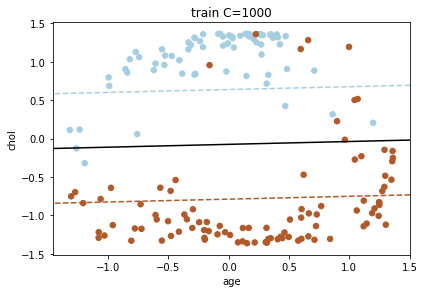

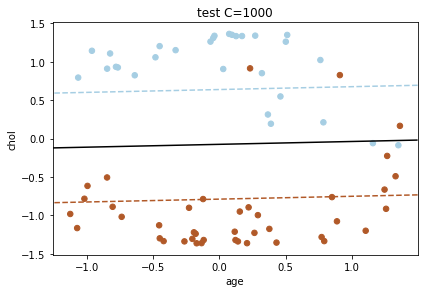

Train accuracy: 0.9337349397590361
Test accuracy: 0.9285714285714286


In [18]:
np.random.seed(1)
c = 1000
clf = svm.LinearSVC(C=c)
clf.fit(r_train_X, r_train_Y)

utils.plot_decision_boundary(clf, r_train_X, r_train_Y, title="train C={}".format(c))
utils.plot_decision_boundary(clf, r_test_X, r_test_Y, title="test C={}".format(c))
print("Train accuracy:", clf.score(r_train_X, r_train_Y))
print("Test accuracy:", clf.score(r_test_X, r_test_Y))

Despite the training accuracy going down a little, regularizing our model increased test accuracy! What if we made C even bigger, or a little smaller -- how would we know what the best regularization amount is? This is an example of a classic problem called “hyperparameter” tuning. Hyperparameters define the configuration of our model -- while “parameters” are automatically learned through optimization like gradient descent using the training data, we manually select the “hyperparameters” we think will make the best model. Yup, it’s that janky. Since we don’t fully understand which models or hyperparameters will work optimally for a given problem, it’s common practice to simply try a wide range of them and empirically see which performs the best!

However, if we tested a bunch of configurations and simply picked the one that preformed best on our test data, we’d be in danger of overfitting our test data. Recall the original reason we set aside the test data was so that our model wouldn’t only learn the data it was given, but generalize. If we run many experiments with the same test data, even if each model can only see the training data, we would be artificially selecting for models which fit the specific test set we use! In order to compare our models but ensure we pick the most general one, rather than the one which best fits a specific test set, we use cross-validation: evaluation by splitting our training and test sets in many different ways and averaging how well the model generalized from each training set to its respective test set.

Let’s evaluate regularization values of C from 10^-6 to 100 using cross-validation on the real heart data.




/Users/osherlerner/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/osherlerner/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/osherlerner/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/osherlerner/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/osherlerner/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to conver

C = 0.01 achieved best val accuracy: 0.8347789115646258


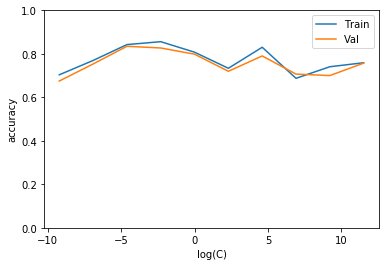

In [23]:
np.random.seed(1)
cs = [100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]
train_scores, val_scores = [], []
for c in cs:
    train_score, val_score = utils.cross_validate_SVM(c, train_X, train_Y)
    train_scores.append(train_score)
    val_scores.append(val_score)

plt.plot(np.log(cs), train_scores, label="Train")
plt.plot(np.log(cs), val_scores, label="Val")
plt.ylim(0,1)
plt.xlabel("log(C)")
plt.ylabel("accuracy")
plt.legend(loc="best")

best_i = np.argmax(val_scores)
best_c, best_score = cs[best_i], val_scores[best_i]
print("C =", best_c, "achieved best val accuracy:", best_score)

Our experiment found the best regularization parameter to be C=0.01, which got us an accuracy of 83.5%! That’s pretty good, but can we do even better? One approach is to tune more hyperparameters of our SVM, such as choosing a nonlinear kernel to make our data more linearly separable. In fact, there are many hyperparameters you can tweak; see sklearn’s documentation for more details.

In general SVM’s are computationally efficient, versatile models for classifying datasets with simple boundaries, but they can require some hyperparameter tuning to get in the sweet spot between over- and under-fitting. For the rest of this article, we’ll look at implementing entirely different approaches to the classification task and see how they compare.



## Decision Trees and Random Forests

Now, we will move on to using pre-implemented decision tree classifiers, where training the model will preselect features for us. We’ll use the `sklearn` library’s implementation again, like we did for SVM’s. First let’s initialize our classifier and fit it to our data:


In [6]:
clf = sklearn.tree.DecisionTreeClassifier(random_state=0)
clf.fit(train_X, train_Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Next we’ll see how well our classifier does on test data. One way is to score the entire model on our test data. 

In [7]:
clf.score(test_X, test_Y)

0.7833333333333333

You might also wonder how specific points are classified. For example if I have a person with a specific combination of characteristics, does our model think that person has heart disease? 

We tried to predict if an average person that is 65 years old, female, and with typical angina chest pain had heart disease. 


In [8]:
test_point = np.mean(train_X)
for dis in discrete_features:
    test_point[dis] = np.around(test_point[dis])
test_point["age"] = 65
test_point["sex"] = 0
test_point["cp"] = 1
print(test_point)
test_point = np.array(test_point).reshape((1, -1))
print("PREDICTION:", clf.predict(test_point)[0])

age          65.000000
sex           0.000000
cp            1.000000
trestbps    131.259259
chol        245.930041
fbs           0.000000
restecg       1.000000
thalach     149.423868
exang         0.000000
oldpeak       1.037860
slope         1.370370
ca            1.000000
thal          2.000000
dtype: float64
PREDICTION: 1


While decision trees applied out-of-the-box achieve great accuracies, they’re not without shortcomings. As we discussed in the Decision Tree and Random Forest blog post, single decision trees are not very robust, and tend to overfit when we’re not careful with our hyperparameters. Let’s take a closer look at two of the hyperparameters of our classifier and see what changing them does to our accuracy. There are many other hyperparameters we can investigate, but for the purposes of this example, we’ll be dealing with tree depth and number of leaves.

Let’s first see what our hyperparameter values were for the Decision Tree we trained above.

In [9]:
print("DEPTH:", clf.get_depth())
print("# LEAVES:", clf.get_n_leaves())

DEPTH: 9
# LEAVES: 40


Now let’s try some other values for the depth and number of leaves.

Val acc of new classifier with max depth 4 and max 4 leaf nodes: 0.8


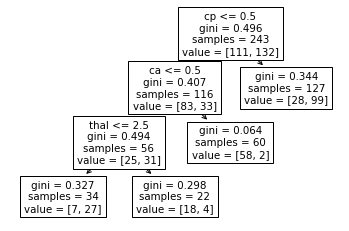

In [27]:
new_clf = sklearn.tree.DecisionTreeClassifier(random_state=0, max_depth=4, max_leaf_nodes=4)
new_clf.fit(train_X, train_Y)
new_score = new_clf.score(test_X, test_Y)
print("Val acc of new classifier with max depth 4 and max 4 leaf nodes:", new_score)

tree.plot_tree(new_clf, feature_names=feature_names);

Val acc of new classifier with max depth 2 and max 3 leaf nodes: 0.75


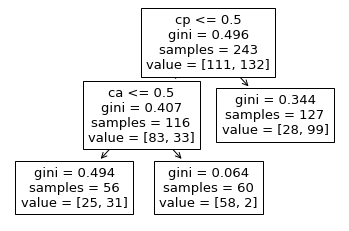

In [28]:
new_clf = sklearn.tree.DecisionTreeClassifier(random_state=0, max_depth=2, max_leaf_nodes=3)
new_clf.fit(train_X, train_Y)
new_score = new_clf.score(test_X, test_Y)
print("Val acc of new classifier with max depth 2 and max 3 leaf nodes:", new_score)

tree.plot_tree(new_clf, feature_names=feature_names);

Another way to prevent overfitting is to use random forests, which take the average of the results of many, many randomly initialized decision trees. Luckily, we won’t implement this on our own (that might take a while!). Again, we’ll use sklearn’s implementation and see how it does:

In [56]:
clf = sklearn.ensemble.RandomForestClassifier(random_state=0)
# assume we have train_X, train_Y, test_X, test_Y
clf.fit(train_X, train_Y)
print("Val acc:", clf.score(test_X, test_Y))

Val acc: 0.8333333333333334


It looks like our Random Forest classifier did a lot better! It combines information from a lot of different, individual Decision Tree models, making it an ensemble method. Ensemble methods offer a lot of advantages, like lower variance, but require a lot more compute to make many copies of the individual models. Decision Trees are relatively inexpensive to use, which make Random Forests a good choice for an ensembling method.